In [82]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import edhec_risk_kit as erk

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
ind = erk.get_ind_returns()
ind.head()

NameError: name 'erk' is not defined

In [60]:
er = erk.annualize_rets(ind['1996':'2000'], 12)
cov = ind['1996':'2000'].cov()

In [61]:
def portfolio_return(weights, returns):
    """
    Weights -> Returns
    """
    return weights.T @ returns

def portfolio_vol(weights, covmat):
    """
    Weights -> Vol
    """
    return (weights.T @ covmat @ weights)**(.5)

In [62]:
l = ['Food', 'Beer', 'Smoke', 'Coal']
er[l]

Food     0.116799
Beer     0.141126
Smoke    0.107830
Coal     0.414689
dtype: float64

In [63]:
cov.loc[l, l]

,Food,Beer,Smoke,Coal
Food,0.002609,0.002379,0.002061,0.000027
Beer,0.002379,0.005264,0.001359,0.001728
Smoke,0.002061,0.001359,0.008349,-0.000733
Coal,0.000027,0.001728,-0.000733,0.018641


In [64]:
weights = np.repeat(1/4, 4)

In [65]:
erk.portfolio_return(weights, er[l])

0.19511097196038385

In [67]:
erk.portfolio_vol(weights, cov.loc[l,l])

0.055059195776437045

# 2 Asset Frontier

In [68]:
l = ['Games', 'Fin']

In [69]:
n_points = 20


In [75]:
def plot_ef2(n_points, er, cov):
    if er.shape[0] !=2 or er.shape[0] !=2:
        raise ValueError('plot_ef2 can only plot 2 asset frontiers')
    weights = [np.array([w, 1-w]) for w in np.linspace(0, 1, n_points)]
    rets = [erk.portfolio_return(w, er) for w in weights]
    vols = [erk.portfolio_vol(w, cov) for w in weights]
    ef = pd.DataFrame({'Returns': rets, 'Volatility': vols})
    return ef.plot.line('Volatility', 'Returns', style = '.-')

<AxesSubplot:xlabel='Volatility'>

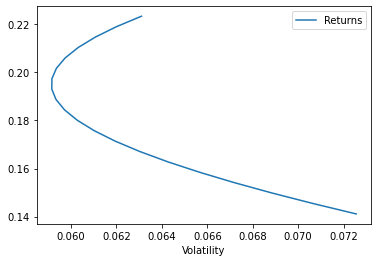

In [84]:
l = ['Fin', 'Beer']
erk.plot_ef2(20, er[l], cov.loc[l,l], style = '-')